#Aula 1


In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
notas.columns = ["usuárioId", "filmeId", "nota", "momento"]
notas

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['nota']

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


In [8]:
notas['nota'].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


#Aula 2

In [9]:
notas['nota'].mean().round(2)

3.5

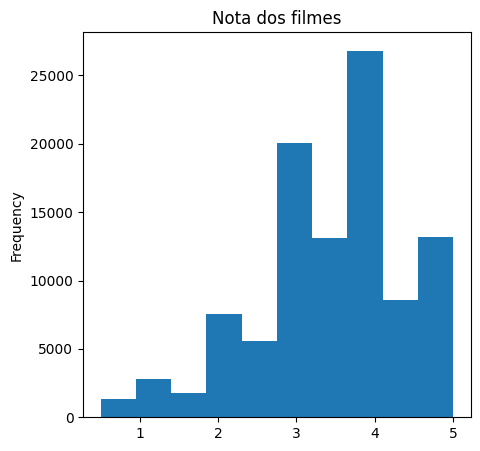

In [10]:
notas['nota'].plot(kind='hist', figsize=(5,5), title='Nota dos filmes');

In [11]:
notas['nota'].median()

3.5

In [12]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana: {mediana}\nMédia: {media}')

Mediana: 3.5
Média: 3.501556983616962


In [13]:
notas['nota'].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


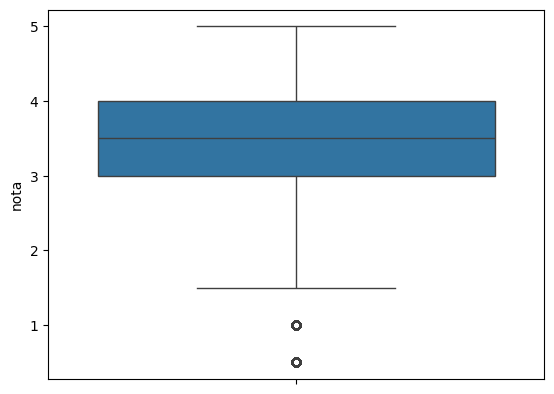

In [14]:
import seaborn as sns
sns.boxplot(notas['nota']);

In [15]:
filmes = pd.read_csv('/content/drive/MyDrive/Alura/DataScience/Formação DS/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
notas.query('filmeId == 1')['nota'].mean().round(2)

3.92

In [18]:
notas.query('filmeId == 2')['nota'].mean().round(2)

3.43

In [19]:
medias_por_filme = notas.groupby('filmeId')['nota'].mean().round(4)
medias_por_filme.head()

,nota
filmeId,
1,3.9209
2,3.4318
3,3.2596
4,2.3571
5,3.0714


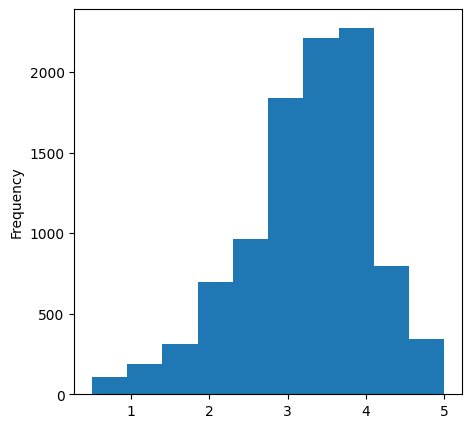

In [20]:
medias_por_filme.plot(kind='hist', figsize=(5,5));

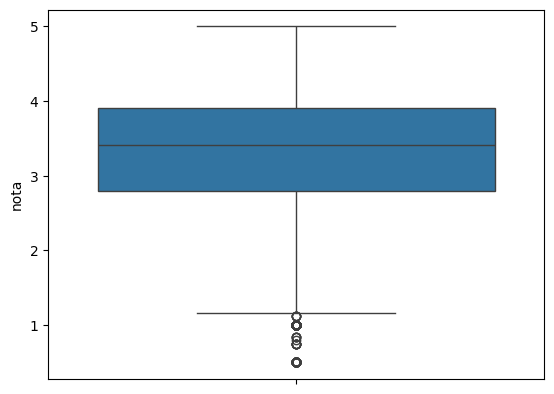

In [21]:
sns.boxplot(medias_por_filme);

In [22]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416700
75%,3.911800
max,5.000000


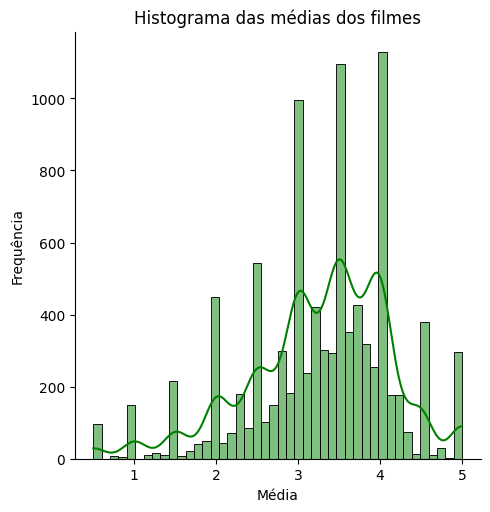

In [23]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True, color='green');
plt.title("Histograma das médias dos filmes");
plt.xlabel("Média");
plt.ylabel("Frequência");

#Aula 3

In [24]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


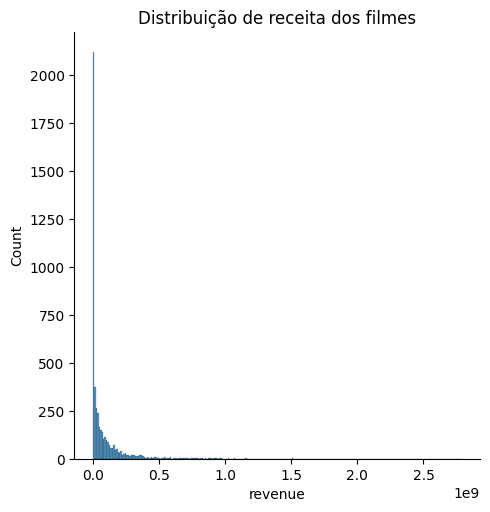

In [25]:
sns.displot(tmdb['revenue']);
plt.title("Distribuição de receita dos filmes");

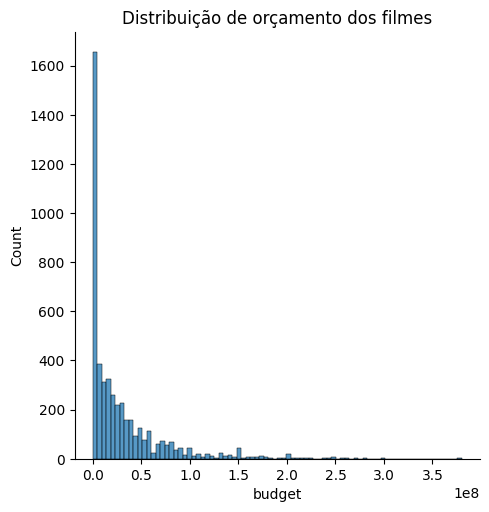

In [26]:
# prompt: gráfico de distribuição do orçamento dos filmes(budget)

import matplotlib.pyplot as plt
sns.displot(tmdb['budget']);
plt.title("Distribuição de orçamento dos filmes");


In [27]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

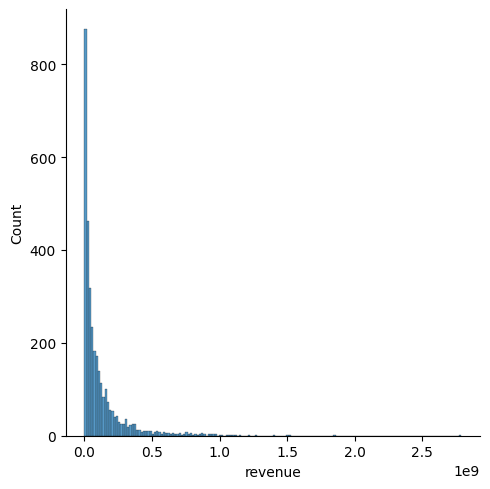

In [28]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento['revenue']);

In [29]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [30]:
tmdb['original_language'].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [31]:
#lingua é categórica sem ordem
#notas é categórica com ordem

#Aula 4

In [32]:
tmdb['original_language'].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [33]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [34]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [35]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


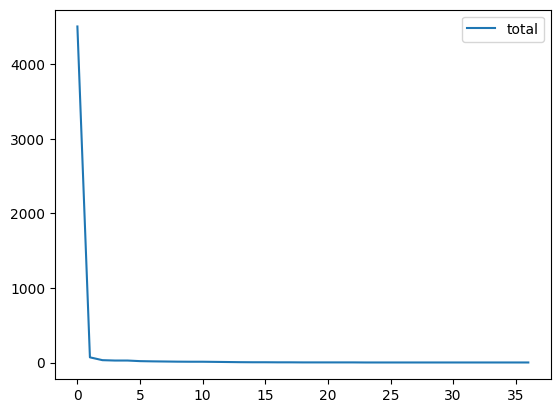

In [36]:
contagem_de_lingua.plot(); #não é esse tipo de gŕafico

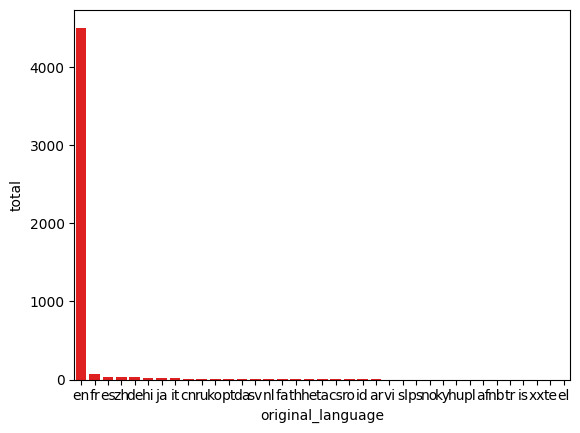

In [37]:
sns.barplot(data= contagem_de_lingua, x='original_language', y='total', color='red');

<Axes: xlabel='original_language', ylabel='count'>

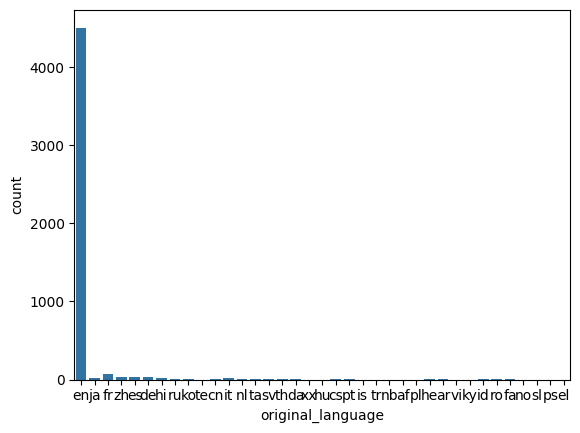

In [38]:
sns.countplot(data=tmdb, x='original_language')

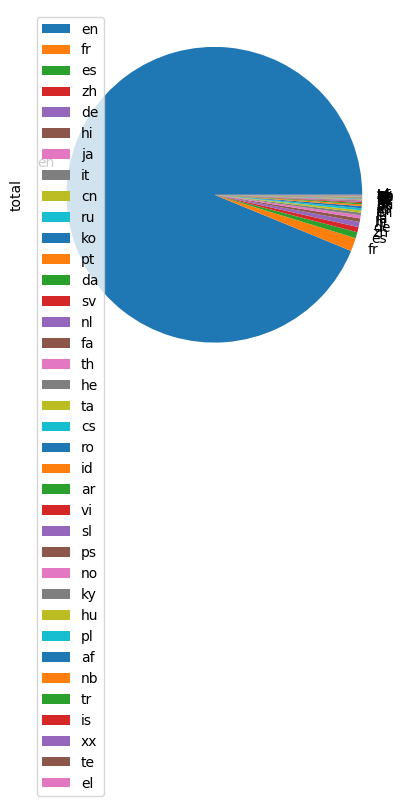

In [39]:
contagem_de_lingua.plot(kind='pie', y='total', labels=contagem_de_lingua['original_language']);


In [40]:
total_por_lingua = tmdb['original_language'].value_counts()
total_de_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_de_ingles
total_do_resto = total_geral - total_de_ingles

print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [41]:
dados = {
'lingua' : ['inglês', 'outros'],
'total': [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,inglês,4505
1,outros,298


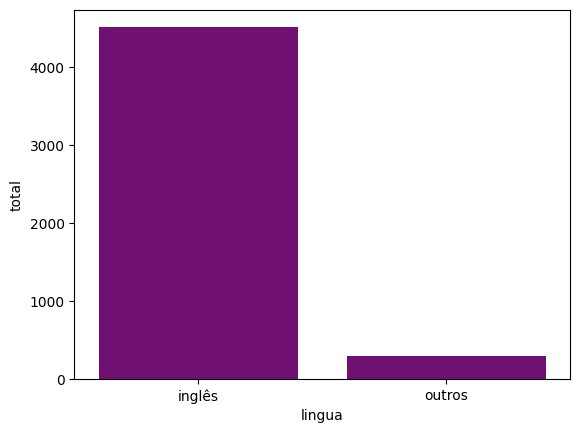

In [42]:
sns.barplot(data=dados, x='lingua', y='total', color="purple");


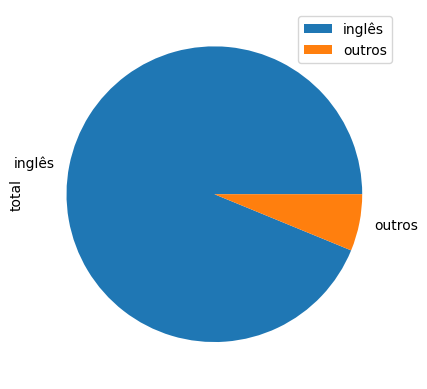

In [43]:
dados.plot(kind='pie', y='total', labels=dados['lingua']);

In [44]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


#Aula 5

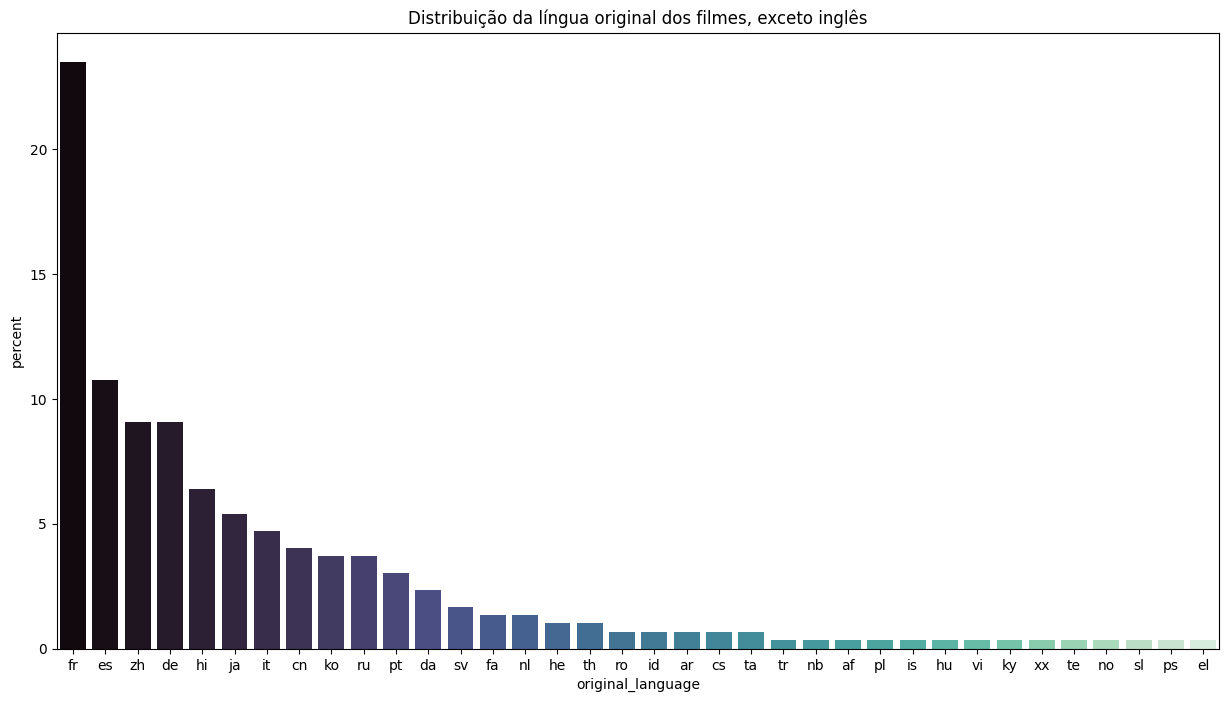

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              x='original_language', hue='original_language',
              palette='mako',
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent");
plt.title("Distribuição da língua original dos filmes, exceto inglês");


In [46]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")['original_language'].value_counts(normalize=True)
total_de_outros_filmes_por_lingua.head()

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758


#Aula 6

In [47]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [48]:
notas_do_toy_story = notas.query("filmeId == 1")['nota']
notas_do_jumanji = notas.query("filmeId == 2")['nota']

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)


3.9209302325581397 3.4318181818181817


In [49]:
mediana_toy_story = notas_do_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(mediana_toy_story, mediana_do_jumanji)


4.0 3.5


In [58]:
import numpy as np

filme1 = [2.5]*10 + [3.5]*10
filme2 = [5]*10 + [1]*10

media_filme1 = np.mean(filme1)
media_filme2 = np.mean(filme2)

print(media_filme1, media_filme2)
mediana_filme1 = np.median(filme1)
mediana_filme2 = np.median(filme2)

print(mediana_filme1, mediana_filme2)

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

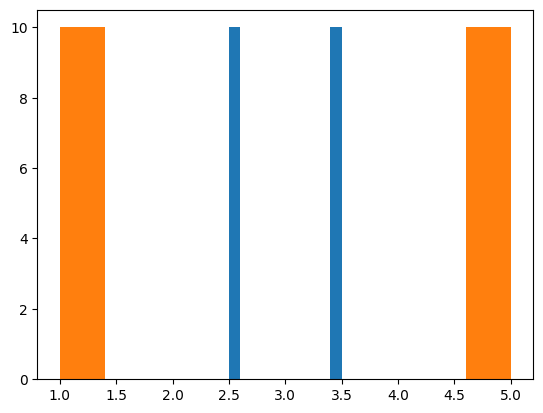

In [59]:
plt.hist(filme1)
plt.hist(filme2)

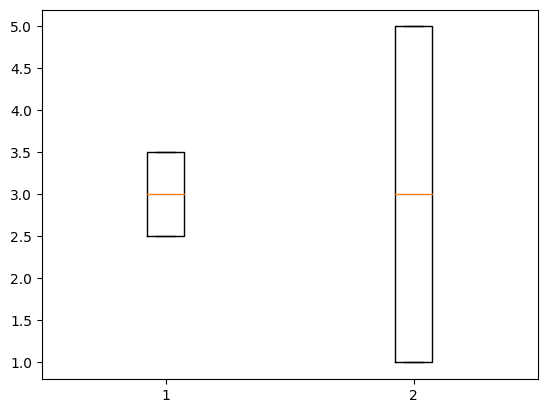

In [61]:
plt.boxplot([filme1, filme2]);

In [62]:
filme0= [3.0]*20 #espalha 0
np.mean(filme0)

3.0

In [65]:
np.std(filme0), np.std(filme1), np.std(filme2)
#um espalha pouco e outro espalha muito

(0.0, 0.5, 2.0)

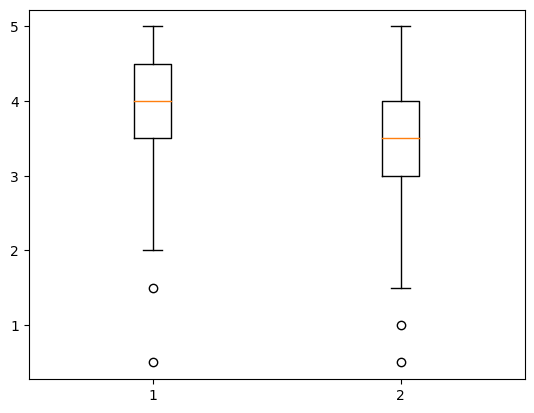

In [66]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji]);

<ipython-input-68-6636859a1053>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query('filmeId in [1,2]'), x='filmeId', y='nota', palette='Set2');


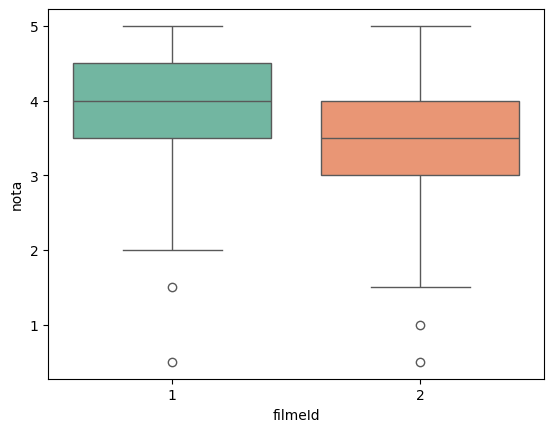

In [68]:
sns.boxplot(data=notas.query('filmeId in [1,2]'), x='filmeId', y='nota', palette='Set2');

In [69]:
notas.groupby('filmeId').count()

,usuárioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [70]:
notas['filmeId'].value_counts()

,count
filmeId,
356,329
318,317
296,307
593,279
2571,278
...,...
86279,1
86922,1
5962,1


In [72]:
notas.groupby('filmeId').count().query('nota==1')

,usuárioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
